In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
# Create dataset
data={
    "syhr":[2,3,5,6,7],
    "atte":[60,65,75,80,85],
    "Res":["Fail","Fail","Pass","Pass","Pass"]
}
df=pd.DataFrame(data)
df

,syhr,atte,Res
0,2,60,Fail
1,3,65,Fail
2,5,75,Pass
3,6,80,Pass
4,7,85,Pass


In [5]:
X=df[["syhr","atte"]]     #features
y=df["Res"]  

In [7]:
df["Res"]=df["Res"].map({"Fail":0,"Pass":1})
df

,syhr,atte,Res
0,2,60,0
1,3,65,0
2,5,75,1
3,6,80,1
4,7,85,1


In [9]:
model=SVC(kernel="linear")
model.fit(X,y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [11]:
w=model.coef_[0]      # w1,w2
b=model.intercept_[0]
print(w)
print(b)

[0.03846154 0.19230769]
-13.615384615384613


In [13]:
new_stu=pd.DataFrame({
    "syhr":[4],
    "atte":[70]
})
pre=model.predict(new_stu)
if pre[0] == "Fail":
    print("prediction Fail")
else:
    print("prediction Pass")

prediction Pass


In [15]:
xva=np.linspace(X["syhr"].min()-1,X["syhr"].max()+1,100)
# y=-(w1*x1+b)/w2
yva=-(w[0]*xva+b)/w[1]

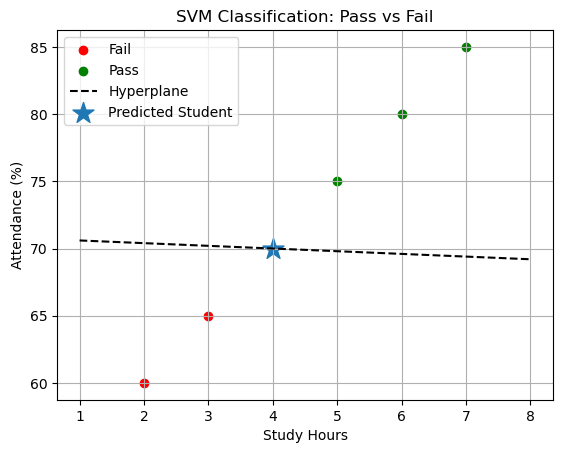

In [17]:
# Separate data
fail = df[df.iloc[:, 2] == 0]   # Result column
pass_ = df[df.iloc[:, 2] == 1]

# Fail points
plt.scatter(
    fail.iloc[:, 0],   # Study Hours
    fail.iloc[:, 1],   # Attendance
    color="red",
    label="Fail"
)

# Pass points
plt.scatter(
    pass_.iloc[:, 0],
    pass_.iloc[:, 1],
    color="green",
    label="Pass"
)

# Hyperplane
plt.plot(xva, yva, "k--", label="Hyperplane")

# Predicted point (NUMPY ARRAY)
plt.scatter(
    new_stu.iloc[0, 0],
    new_stu.iloc[0, 1],
    marker="*",
    s=250,
    label="Predicted Student"
)

plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("SVM Classification: Pass vs Fail")
plt.legend()
plt.grid(True)
plt.show()